In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tqdm import tqdm
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import img_to_array
from keras import regularizers
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.optimizers import RMSprop
import skimage
import matplotlib.pyplot as plt
import cv2
from skimage import color
from skimage.transform import resize, rotate
from skimage.util import crop
from re import X
import keras
from keras.regularizers import l2

In [ ]:
SIZE = 256


# Small Data set
# For training /content/drive/MyDrive/CUHK Dataset/CUHK_testing_cropped_sketches
image_path = '/content/drive/MyDrive/CUHK Dataset/CUHK_training_photo/'
img_array = []

sketch_path = '/content/drive/MyDrive/CUHK Dataset/CUHK_training_sketch/'
sketch_array = []

# For testing
test_image_path = '/content/drive/MyDrive/CUHK Dataset/CUHK_testing_photo/'
test_img_array = []

test_sketch_path = '/content/drive/MyDrive/CUHK Dataset/CUHK_testing_sketch/'
test_sketch_array = []


# Big data set
#image_path = '/content/drive/MyDrive/Sketch Feret Dataset/photos/'
#img_array = []

#sketch_path = '/content/drive/MyDrive/Sketch Feret Dataset/sketches/'
#sketch_array = []

# Image and their corresponding file names in a sorted manner based on their names
image_file = sorted(os.listdir(image_path))
sketch_file = sorted(os.listdir(sketch_path))
test_image_file = sorted(os.listdir(test_image_path))
test_sketch_file = sorted(os.listdir(test_sketch_path))

In [ ]:
def image_preprocessing1(file_name, img_path, size):
  storage_array = []
  for img_file in tqdm(file_name):
    x = img_path + img_file
    img = (resize(plt.imread(x).astype('float32'),(SIZE,SIZE), anti_aliasing=True))/255.0
    storage_array.append(img)

    # horizontal flip 
    img1 = cv2.flip(img,1)
    storage_array.append(img_to_array(img1))
  
    #vertical flip 
    img2 = cv2.flip(img,-1)
    storage_array.append(img_to_array(img2))

    # rotate clockwise 
    img3 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    storage_array.append(img_to_array(img3))

     # rotate anti clockwise 
    img4 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    storage_array.append(img_to_array(img4))
    '''
    # flip rotated image 
    img7 = cv2.flip(img4,1)
    storage_array.append(img_to_array(img7))
   ''' 
  # Returning storage array where we have stored all our pre-processed images
  return np.array(storage_array)

# For sketch images
def image_preprocessing2(file_name, img_path, size):
  storage_array = []
  for img_file in tqdm(file_name):
    x = img_path + img_file
    a = cv2.imread(x).astype('float32')
    # Removing irrelevant text from image
    a = a[55:]
    # Resizing
    a=resize(a,(SIZE, SIZE), anti_aliasing=True)
    # Normalization of array
    a = (a - 127.5) / 127.5
    img = a
    storage_array.append(img)

    # horizontal flip 
    img1 = cv2.flip(img,1)
    storage_array.append(img_to_array(img1))

    #vertical flip 
    img2 = cv2.flip(img,-1)
    storage_array.append(img_to_array(img2))

    # rotate clockwise 
    img3 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    storage_array.append(img_to_array(img3))

     # rotate anti clockwise 
    img4 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    storage_array.append(img_to_array(img4))
  '''
    # flip rotated image 
    img7 = cv2.flip(img4,1)
    storage_array.append(img_to_array(img7))
   ''' 
  # Returning storage array where we have stored all our pre-processed images
  return np.array(storage_array) 

In [ ]:
img_array = image_preprocessing1(image_file, image_path, SIZE)
sketch_array = image_preprocessing2(sketch_file, sketch_path, SIZE)
test_img_array = image_preprocessing1(test_image_file, test_image_path, SIZE)
test_sketch_array = image_preprocessing2(test_sketch_file, test_sketch_path, SIZE)


100%|██████████| 100/100 [00:03<00:00, 31.46it/s]


In [ ]:
# Print the number of colored and sketch images present
print("Total number of Training Colored images:",len(img_array))
print("Total number of Training sketch images:",len(sketch_array))

print("Total number of Testing Colored images:",len(test_img_array))
print("Total number of Testing sketch images:",len(test_sketch_array))

Total number of Training Colored images: 440
Total number of Training sketch images: 440
Total number of Testing Colored images: 500
Total number of Testing sketch images: 500


In [ ]:
'''
x_train = img_array[:-200]
y_train = sketch_array[:-200]
x_test = img_array[-200:]
y_test = sketch_array[-200:]
'''

'\nx_train = img_array[:-200]\ny_train = sketch_array[:-200]\nx_test = img_array[-200:]\ny_test = sketch_array[-200:]\n'

In [ ]:
x_test = test_img_array
y_test = test_sketch_array
x_train = img_array
y_train = sketch_array

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((440, 256, 256, 3),
 (440, 256, 256, 3),
 (500, 256, 256, 3),
 (500, 256, 256, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

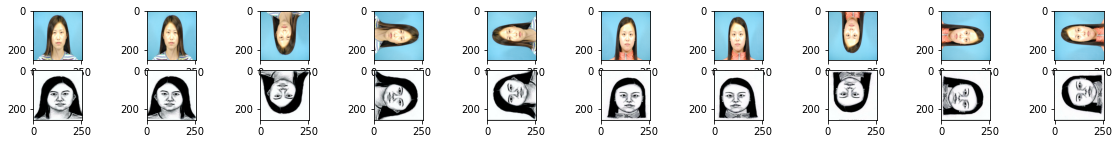

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(y_test[i])
    plt.gray()
plt.show()

In [ ]:

input_img = keras.Input(shape=(256, 256, 3))

x = keras.layers.Conv2D(16, (4, 4), activation='relu', strides=2)(input_img)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2D(32, (4, 4), 
                        activation='relu',
                        strides=2)(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2D(64, (4, 4), 
                        activation='relu',
                        strides=2)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2D(128, (4, 4), 
                        activation='relu',
                        strides=2)(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2D(256, (4, 4), 
                        activation='relu',
                        strides=2)(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2D(512, (4, 4), 
                        activation='swish',
                        strides=2)(x)
x=keras.layers.BatchNormalization()(x)
encoded=keras.layers.LeakyReLU()(x)

# Decoder start
x = keras.layers.Conv2DTranspose(512, (4, 4), 
                                 activation='relu',
                                 strides=2)(encoded)
x=keras.layers.Dropout(0.1)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2DTranspose(256, (4, 4), 
                                 activation='relu',
                                 strides=2)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2DTranspose(128, (4, 4), 
                                 activation='relu',
                                 strides=2)(x)
x=keras.layers.Dropout(0.1)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2DTranspose(64, (4, 4), 
                                 activation='relu',
                                 strides=2)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2DTranspose(32, (4, 4), 
                                 activation='relu',
                                 strides=2)(x)
x=keras.layers.LeakyReLU()(x)

x = keras.layers.Conv2DTranspose(16, (4, 4), 
                                 activation='relu',
                                 strides=2)(x)
x=keras.layers.LeakyReLU()(x)
x = keras.layers.Conv2DTranspose(8, (2, 2), 
                                 activation='relu', 
                                 padding='valid',strides=(1,1))(x)
decoded = keras.layers.Conv2DTranspose(3, (2, 2), 
                                       activation='relu', 
                                       padding='valid',strides=(1,1))(x)


model_convAE = keras.Model(input_img, decoded)

# Separable conv encoder
model_convAE_encoder = keras.Model(input_img, encoded)

In [ ]:
model_convAE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 127, 127, 16)      784       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 127, 127, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        8224      
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 62, 62, 32)        0         
                                                           

Epoch 1/500
14/14 [==============================] - 4s 247ms/step - loss: 0.4875 - accuracy: 0.2799 - val_loss: 0.5709 - val_accuracy: 0.5744
Epoch 2/500
14/14 [==============================] - 2s 135ms/step - loss: 0.2130 - accuracy: 0.2885 - val_loss: 0.4824 - val_accuracy: 0.5286
Epoch 3/500
14/14 [==============================] - 2s 137ms/step - loss: 0.1562 - accuracy: 0.3161 - val_loss: 0.4522 - val_accuracy: 0.5760
Epoch 4/500
14/14 [==============================] - 2s 137ms/step - loss: 0.1369 - accuracy: 0.3008 - val_loss: 0.4453 - val_accuracy: 0.5182
Epoch 5/500
14/14 [==============================] - 2s 137ms/step - loss: 0.1266 - accuracy: 0.3134 - val_loss: 0.4604 - val_accuracy: 0.5211
Epoch 6/500
14/14 [==============================] - 2s 136ms/step - loss: 0.1173 - accuracy: 0.3133 - val_loss: 0.4793 - val_accuracy: 0.4813
Epoch 7/500
14/14 [==============================] - 2s 135ms/step - loss: 0.1065 - accuracy: 0.3302 - val_loss: 0.4979 - val_accuracy: 0.4034

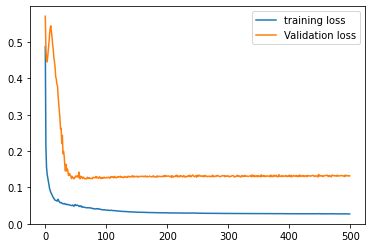

In [ ]:
model_convAE.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

model_convAE.fit(x_train, y_train,
                epochs=500,
                shuffle=True,
                validation_data=(x_test, y_test))

plt.plot(model_convAE.history.history["loss"])
plt.plot(model_convAE.history.history["val_loss"])
plt.legend(['training loss', 'Validation loss'])

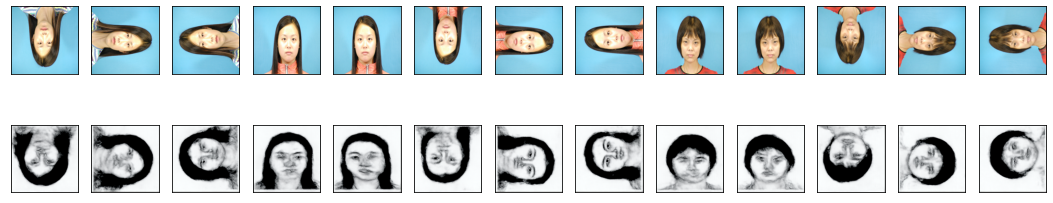

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
clip=np.clip(decoded_imgs,0,1)
n = 14
fig=plt.figure(figsize=(20, 4))
for i in range(2, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(clip[i].astype('float32'))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#fig.savefig("/content/drive/MyDrive/SCC 413-Colab notebooks/Week 13/output_fs_cae.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


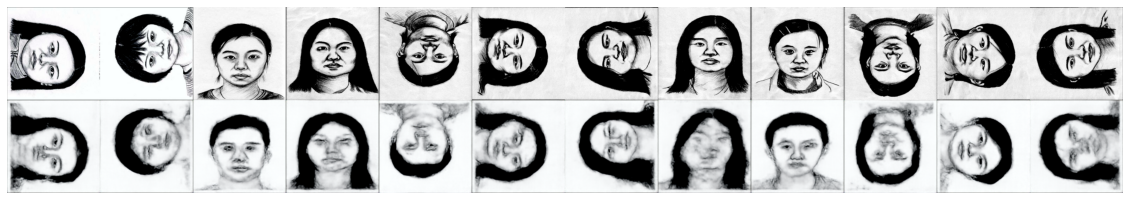

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
some_photos = []
sketch_photos = []
for i in range(8, 80, 6):
  some_photos.append(y_test[i])
  sketch_photos.append(decoded_imgs[i])


X = np.concatenate(some_photos, axis=1)
Y = np.concatenate(sketch_photos, axis=1)

plt.figure(figsize=(20,10))
plt.imshow(np.concatenate([X,Y]))
plt.axis("OFF")
plt.show()

# Applying mean absolute error

Epoch 1/500
14/14 [==============================] - 4s 187ms/step - loss: 0.1255 - accuracy: 0.4043 - val_loss: 0.2241 - val_accuracy: 0.2508
Epoch 2/500
14/14 [==============================] - 2s 135ms/step - loss: 0.0946 - accuracy: 0.3967 - val_loss: 0.2119 - val_accuracy: 0.2508
Epoch 3/500
14/14 [==============================] - 2s 134ms/step - loss: 0.0871 - accuracy: 0.3932 - val_loss: 0.2146 - val_accuracy: 0.2613
Epoch 4/500
14/14 [==============================] - 2s 136ms/step - loss: 0.0836 - accuracy: 0.3960 - val_loss: 0.2125 - val_accuracy: 0.2535
Epoch 5/500
14/14 [==============================] - 2s 136ms/step - loss: 0.0817 - accuracy: 0.4015 - val_loss: 0.2139 - val_accuracy: 0.2577
Epoch 6/500
14/14 [==============================] - 2s 136ms/step - loss: 0.0830 - accuracy: 0.3981 - val_loss: 0.2166 - val_accuracy: 0.2591
Epoch 7/500
14/14 [==============================] - 2s 135ms/step - loss: 0.0843 - accuracy: 0.3925 - val_loss: 0.2125 - val_accuracy: 0.2450

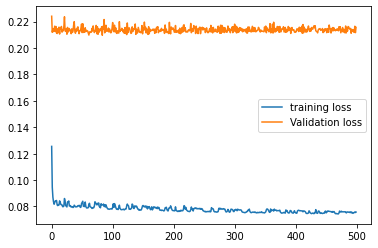

In [ ]:
model_convAE.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

model_convAE.fit(x_train, y_train,
                epochs=500,
                shuffle=True,
                validation_data=(x_test, y_test))

plt.plot(model_convAE.history.history["loss"])
plt.plot(model_convAE.history.history["val_loss"])
plt.legend(['training loss', 'Validation loss'])

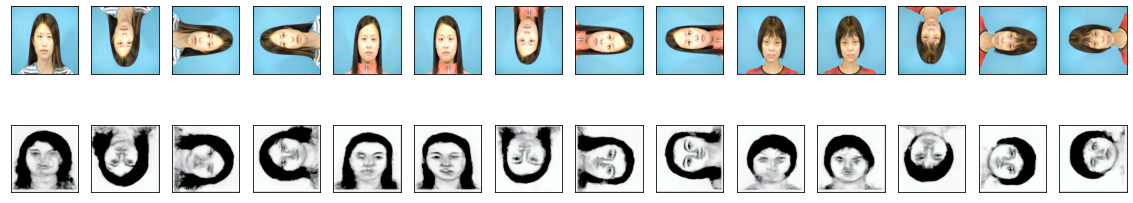

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
clip=np.clip(decoded_imgs,0,1)
n = 14
fig=plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(clip[i].astype('float32'))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#fig.savefig("/content/drive/MyDrive/SCC 413-Colab notebooks/Week 13/output_fs_cae.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


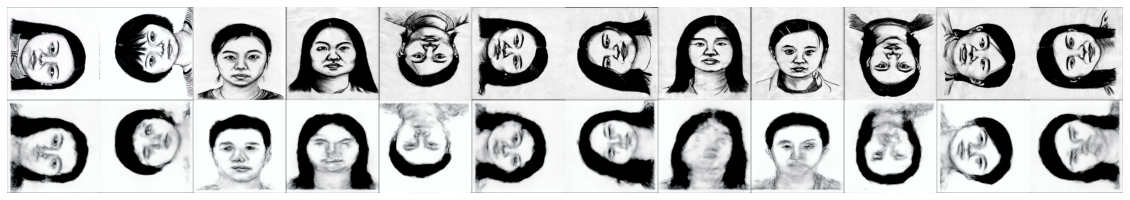

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
some_photos = []
sketch_photos = []
for i in range(8, 80, 6):
  some_photos.append(y_test[i])
  sketch_photos.append(decoded_imgs[i])


X = np.concatenate(some_photos, axis=1)
Y = np.concatenate(sketch_photos, axis=1)

plt.figure(figsize=(20,10))
plt.imshow(np.concatenate([X,Y]))
plt.axis("OFF")
plt.show()

# Applying binary_crossentropy

Epoch 1/500
14/14 [==============================] - 4s 192ms/step - loss: -0.5411 - accuracy: 0.3269 - val_loss: 0.1166 - val_accuracy: 0.2504
Epoch 2/500
14/14 [==============================] - 2s 139ms/step - loss: -0.5534 - accuracy: 0.4622 - val_loss: 0.1578 - val_accuracy: 0.2662
Epoch 3/500
14/14 [==============================] - 2s 140ms/step - loss: -0.5583 - accuracy: 0.3815 - val_loss: 0.0545 - val_accuracy: 0.2643
Epoch 4/500
14/14 [==============================] - 2s 140ms/step - loss: -0.5586 - accuracy: 0.4238 - val_loss: 0.0641 - val_accuracy: 0.2564
Epoch 5/500
14/14 [==============================] - 2s 140ms/step - loss: -0.5568 - accuracy: 0.4049 - val_loss: 0.0728 - val_accuracy: 0.2321
Epoch 6/500
14/14 [==============================] - 2s 138ms/step - loss: -0.5561 - accuracy: 0.4215 - val_loss: 0.0932 - val_accuracy: 0.2551
Epoch 7/500
14/14 [==============================] - 2s 139ms/step - loss: -0.5552 - accuracy: 0.4508 - val_loss: 0.0888 - val_accuracy:

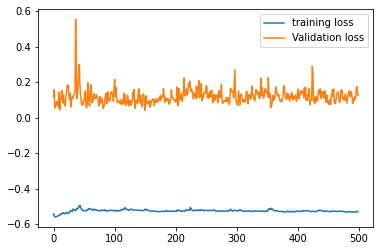

In [ ]:
model_convAE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_convAE.fit(x_train, y_train,
                epochs=500,
                shuffle=True,
                validation_data=(x_test, y_test))

plt.plot(model_convAE.history.history["loss"])
plt.plot(model_convAE.history.history["val_loss"])
plt.legend(['training loss', 'Validation loss'])

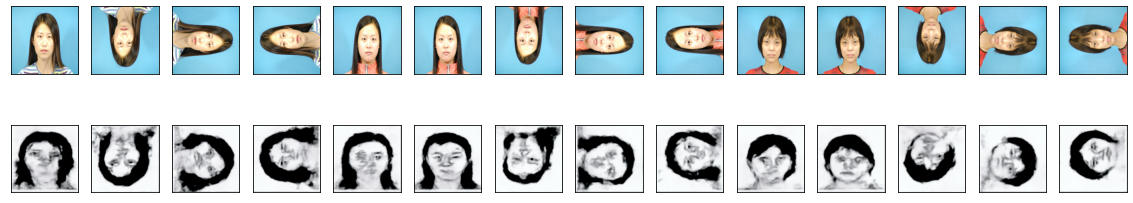

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
clip=np.clip(decoded_imgs,0,1)
n = 14
fig=plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(clip[i].astype('float32'))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#fig.savefig("/content/drive/MyDrive/SCC 413-Colab notebooks/Week 13/output_fs_cae.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


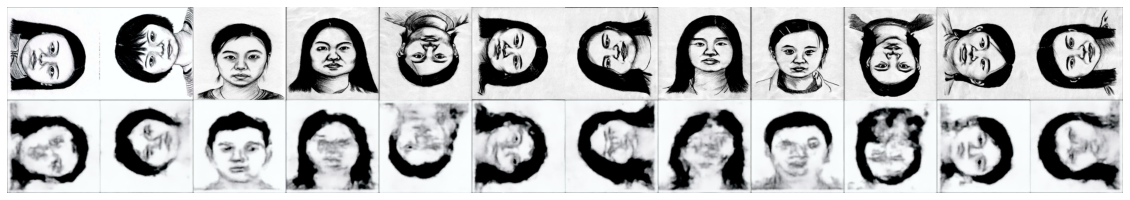

In [ ]:
decoded_imgs = model_convAE.predict(x_test)
some_photos = []
sketch_photos = []
for i in range(8, 80, 6):
  some_photos.append(y_test[i])
  sketch_photos.append(decoded_imgs[i])


X = np.concatenate(some_photos, axis=1)
Y = np.concatenate(sketch_photos, axis=1)

plt.figure(figsize=(20,10))
plt.imshow(np.concatenate([X,Y]))
plt.axis("OFF")
plt.show()